In [ ]:
!pip show torch

Name: torch
Version: 2.1.0+cu118
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, fsspec, jinja2, networkx, sympy, triton, typing-extensions
Required-by: fastai, torchaudio, torchdata, torchtext, torchvision


In [ ]:
!pip install git+https://github.com/qubvel/segmentation_models.pytorch
!pip install pytorch-lightning

  Cloning https://github.com/qubvel/segmentation_models.pytorch to /tmp/pip-req-build-p68feu9j
  Running command git clone --filter=blob:none --quiet https://github.com/qubvel/segmentation_models.pytorch /tmp/pip-req-build-p68feu9j
  Resolved https://github.com/qubvel/segmentation_models.pytorch to commit 6db76a1106426ac5b55f39fba68168f3bccae7f8
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 33.6 MB/s eta 0:00:00
  Created wheel for segmentation-models-pytorch: filename=segmentation_models_pytorch-0.3.3-py3-none-any.whl size=106723 sha256=c217660f23b4fbf0c5d7605af9297a417fe75f854c56093669676c6b44153da4
  Stored in directory: /tmp/pip-ephem-wheel-cache-qv1tnil3/wheels/1a/49/5f/858bc274

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
DATA_DIR = './data/CamVid/'

# load repo with data if it is not exists
if not os.path.exists(DATA_DIR):
    print('Loading data...')
    os.system('git clone https://github.com/alexgkendall/SegNet-Tutorial ./data')
    print('Done!')

Loading data...
Done!


In [ ]:
x_train_dir = os.path.join(DATA_DIR, 'train')
y_train_dir = os.path.join(DATA_DIR, 'trainannot')

x_val_dir = os.path.join(DATA_DIR, 'val')
y_val_dir = os.path.join(DATA_DIR, 'valannot')

x_test_dir = os.path.join(DATA_DIR, 'test')
y_test_dir = os.path.join(DATA_DIR, 'testannot')

# Loading a single photo

To load the photo we will use the PIL library which allows you to perform operations on photos in python

In [ ]:
from PIL import Image
import numpy as np

Upload a photo from disk

In [ ]:
image = Image.open("./data/CamVid/test/0001TP_008550.png")

We can convert the photo to a numpy matrix with the dimensions (height, width, color)

In [ ]:
np.array(image).shape

(360, 480, 3)

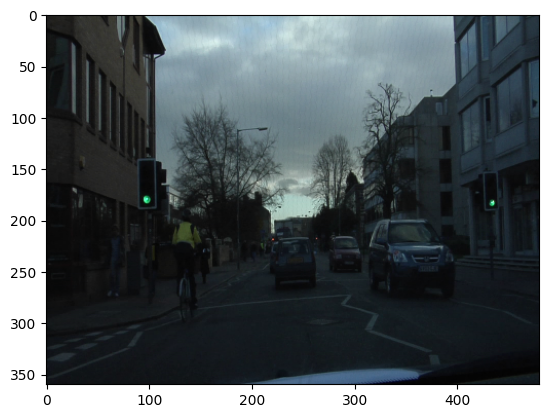

In [ ]:
plt.imshow(np.array(image))

## Loading the mask

In [ ]:
mask = Image.open("./data/CamVid/testannot/0001TP_008550.png")

Image mask - each number is a segmentation class index

In [ ]:
np.array(mask).shape

(360, 480)

In [ ]:
np.array(mask)

array([[ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  1,  1, ...,  1,  1,  1],
       ...,
       [ 3,  3,  3, ..., 11, 11, 11],
       [ 3,  3,  3, ..., 11, 11, 11],
       [ 3,  3,  3, ..., 11, 11, 11]], dtype=uint8)

In [ ]:
CLASSES = ['sky', 'building', 'pole', 'road', 'pavement',
               'tree', 'signsymbol', 'fence', 'car',
               'pedestrian', 'bicyclist', 'unlabelled']

In [ ]:
classes = ['sky',"building"]

In [ ]:
class_values = [CLASSES.index(cls.lower()) for cls in classes]

In [ ]:
import torchvision.transforms as transforms

In [ ]:
mask = transforms.Compose([
    # other transforms
    transforms.ToTensor(),
    lambda x: x*255
])(mask).squeeze()

In [ ]:
mask.shape

torch.Size([360, 480])

In [ ]:
mask

tensor([[ 1.,  1.,  1.,  ...,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  ...,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  ...,  1.,  1.,  1.],
        ...,
        [ 3.,  3.,  3.,  ..., 11., 11., 11.],
        [ 3.,  3.,  3.,  ..., 11., 11., 11.],
        [ 3.,  3.,  3.,  ..., 11., 11., 11.]])

In [ ]:
masks = [(mask == v) for v in class_values]

In [ ]:
masks

[tensor([[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]]),
 tensor([[ True,  True,  True,  ...,  True,  True,  True],
         [ True,  True,  True,  ...,  True,  True,  True],
         [ True,  True,  True,  ...,  True,  True,  True],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]])]

In [ ]:
import torch

In [ ]:
mask = torch.stack(masks, axis=0)

In [ ]:
mask.shape

torch.Size([2, 360, 480])

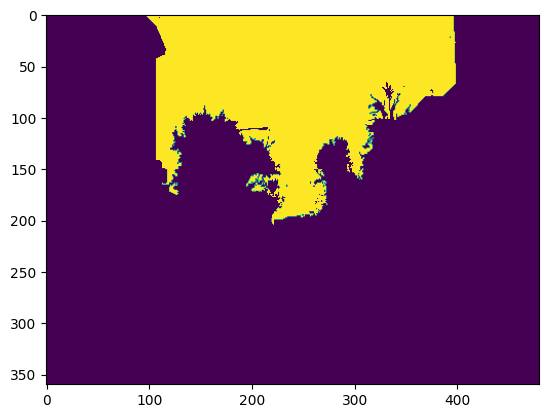

In [ ]:
plt.imshow(masks[0])

# Task 1

Complete the class of the dataset.
- [ ] 1.1 provide class names
- [ ] 1.2 create a list of file names using the appropriate function from the os library.
- [ ] 1.3 load the appropriate image and mask
- [ ] 1.4 transform the image and mask using the transformations created

## Dataset


In [ ]:
from torch.utils.data import DataLoader
from torch.utils.data import Dataset

In [ ]:
class SegmentationDataset(Dataset):

    CLASSES = # TODO

    def __init__(
            self,
            images_dir,
            masks_dir,
            preprocessing=None,
    ):
        self.ids = # create a list of file names using the appropriate function from the os library
        self.images_fps = [os.path.join(images_dir, image_id) for image_id in self.ids]
        self.masks_fps = [os.path.join(masks_dir, image_id) for image_id in self.ids]

        # convert str names to class values on masks
        self.class_values = list(range(len(self.CLASSES)))

        self.preprocessing = preprocessing
        self.image_transform = transforms.Compose([
                                    transforms.CenterCrop((352,480)),
                                    transforms.ToTensor()])
        self.mask_transform = transforms.Compose([
                                    transforms.CenterCrop((352,480)),
                                    transforms.ToTensor(),
                                    lambda x: x*255])

    def __getitem__(self, i):

        # read data
        image = # TODO
        mask =  # TODO

        # extract certain classes from mask (e.g. cars)
        image = # TODO
        mask = # TODO



        # apply preprocessing
        if self.preprocessing:
            sample = self.preprocessing(image=image, mask=mask)
            image, mask = sample['image'], sample['mask']

        return image, mask

    def __len__(self):
        return len(self.ids)

In [ ]:
dataset = SegmentationDataset(x_train_dir, y_train_dir)

In [ ]:
image, mask = dataset[0]

In [ ]:
image.shape

torch.Size([3, 352, 480])

In [ ]:
mask.shape

torch.Size([352, 480])

In [ ]:
mask

tensor([[1., 1., 1.,  ..., 0., 0., 0.],
        [1., 1., 1.,  ..., 0., 0., 0.],
        [1., 1., 1.,  ..., 0., 0., 0.],
        ...,
        [3., 3., 3.,  ..., 3., 3., 3.],
        [3., 3., 3.,  ..., 3., 3., 3.],
        [3., 3., 3.,  ..., 3., 3., 3.]])

In [ ]:
import pytorch_lightning as pl

In [ ]:
class DataModule(pl.LightningDataModule):
    def __init__(self, x_train_dir, y_train_dir,x_val_dir, y_val_dir, x_test_dir, y_test_dir, batch_size = 16):
        super().__init__()
        self.x_train_dir = x_train_dir
        self.y_train_dir = y_train_dir

        self.x_val_dir = x_val_dir
        self.y_val_dir = y_val_dir

        self.x_test_dir = x_test_dir
        self.y_test_dir = y_test_dir

        self.batch_size = batch_size

    def setup(self, stage = None):

        self.train_dataset = SegmentationDataset(self.x_train_dir, self.y_train_dir)
        self.val_dataset = SegmentationDataset(self.x_val_dir, self.y_val_dir)
        self.test_dataset = SegmentationDataset(self.x_test_dir, self.y_test_dir)

    def train_dataloader(self):
        return DataLoader(self.train_dataset, batch_size=self.batch_size)

    def val_dataloader(self):
        return DataLoader(self.val_dataset, batch_size=self.batch_size)

    def test_dataloader(self):
        return DataLoader(self.test_dataset, batch_size=self.batch_size)



In [ ]:
dm = DataModule(x_train_dir,y_train_dir, x_val_dir, y_val_dir, x_test_dir, y_test_dir)

# Task 2 - working with the segmentation_models_pytorch library

- [ ] 2.1 Create a model for segmentation using the smp library, use a ready-made architecture and a pre-trained encoder.
- [ ] 2.2 Calculate iou score in training loop


# Model

In [ ]:
!pip install torchgeometry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42 kB 43 kB/s 


In [ ]:
from torchgeometry.losses import DiceLoss
import segmentation_models_pytorch as smp


In [ ]:
class SegmentationModel(pl.LightningModule):

    def __init__(self, arch, encoder_name, in_channels, out_classes):
        super().__init__()


        self.model = # TODO: create a model for segmentation using the smp library

        self.loss_fn = DiceLoss()
        self.out_classes = out_classes

    def forward(self, image):
        mask = self.model(image)
        return mask

    def training_step(self, batch, batch_idx):

        image, mask = batch

        pred_mask = self.forward(image)

        loss = self.loss_fn(pred_mask.float(), mask.to(torch.int64))

        pred_mask = torch.argmax(pred_mask,dim=1)

        iou_score = # TODO: Calculate iou score


        self.log('train_loss', loss, on_step= True, on_epoch = True)
        self.log('iou_score', iou_score, on_step= True, on_epoch = True)


        return loss

    def validation_step(self, batch, batch_idx):

        image, mask = batch

        pred_mask = self.forward(image)

        loss = self.loss_fn(pred_mask.float(), mask.to(torch.int64))



        self.log('val_loss', loss, on_step= True, on_epoch = True)

        return loss



    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=0.0001)

In [ ]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
model = SegmentationModel("FPN", "se_resnext50_32x4d", in_channels=3, out_classes=len(SegmentationDataset.CLASSES))

Downloading: "http://data.lip6.fr/cadene/pretrainedmodels/se_resnext50_32x4d-a260b3a4.pth" to /root/.cache/torch/hub/checkpoints/se_resnext50_32x4d-a260b3a4.pth


  0%|          | 0.00/105M [00:00<?, ?B/s]

# Trening

In [ ]:
from pytorch_lightning.loggers import TensorBoardLogger

In [ ]:
logger = TensorBoardLogger("lightning_logs", name="segmentation model")

In [ ]:
trainer = pl.Trainer(
    gpus=1,
    max_epochs=20,
    logger = logger
)

trainer.fit(model, dm)

In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir lightning_logs

# Test

In [ ]:
test_image, test_mask = dm.test_dataset[0]

In [ ]:
output_mask = model(test_image.unsqueeze(0))[0]

In [ ]:
output_mask

In [ ]:
output_mask.shape

Figures the most likely class for each pixel

In [ ]:
predicted_class = torch.argmax(output_mask,dim=0)

In [ ]:
predicted_class.shape

In [ ]:
plt.imshow(predicted_class.cpu().detach().numpy())

In [ ]:
plt.imshow(test_mask)

The model does not perform perfectly but has very little training data, it could be improved by adding augmentations https://github.com/qubvel/segmentation_models.pytorch/blob/master/examples/cars%20segmentation%20(camvid).ipynb

# Task 3
Try to get better segmentation using augmentation. To do this, define a new dataset class. Train the model on the new dataset and compare the mask with the mask from the previous model.

In [ ]:
class SegmentationDatasetWithAugmentation(Dataset):

    CLASSES = ['sky', 'building', 'pole', 'road', 'pavement',
               'tree', 'signsymbol', 'fence', 'car',
               'pedestrian', 'bicyclist', 'unlabelled']

    def __init__(
            self,
            images_dir,
            masks_dir,
            preprocessing=None,
    ):
        self.ids = os.listdir(images_dir)
        self.images_fps = [os.path.join(images_dir, image_id) for image_id in self.ids]
        self.masks_fps = [os.path.join(masks_dir, image_id) for image_id in self.ids]

        # convert str names to class values on masks
        self.class_values = list(range(len(self.CLASSES)))

        self.preprocessing = preprocessing
        # TODO: add augmentation
        self.image_transform = transforms.Compose([
                                    transforms.CenterCrop((352,480)),
                                    transforms.ToTensor()])
        self.mask_transform = transforms.Compose([
                                    transforms.CenterCrop((352,480)),
                                    transforms.ToTensor(),
                                    lambda x: x*255])

    def __getitem__(self, i):

        # read data
        image = Image.open(self.images_fps[i])
        mask = Image.open(self.masks_fps[i])

        # extract certain classes from mask (e.g. cars)
        image = self.image_transform(image)
        mask = self.mask_transform(mask).squeeze()



        # apply preprocessing
        if self.preprocessing:
            sample = self.preprocessing(image=image, mask=mask)
            image, mask = sample['image'], sample['mask']

        return image, mask

    def __len__(self):
        return len(self.ids)

In [ ]:
class DataModuleWithAugmentation(pl.LightningDataModule):
    def __init__(self, x_train_dir, y_train_dir,x_val_dir, y_val_dir, x_test_dir, y_test_dir, batch_size = 16):
        super().__init__()
        self.x_train_dir = x_train_dir
        self.y_train_dir = y_train_dir

        self.x_val_dir = x_val_dir
        self.y_val_dir = y_val_dir

        self.x_test_dir = x_test_dir
        self.y_test_dir = y_test_dir

        self.batch_size = batch_size

    def setup(self, stage = None):

        self.train_dataset = SegmentationDatasetWithAugmentation(self.x_train_dir, self.y_train_dir)
        self.val_dataset = SegmentationDatasetWithAugmentation(self.x_val_dir, self.y_val_dir)
        self.test_dataset = SegmentationDatasetWithAugmentation(self.x_test_dir, self.y_test_dir)

    def train_dataloader(self):
        return DataLoader(self.train_dataset, batch_size=self.batch_size)

    def val_dataloader(self):
        return DataLoader(self.val_dataset, batch_size=self.batch_size)

    def test_dataloader(self):
        return DataLoader(self.test_dataset, batch_size=self.batch_size)

In [ ]:
dm = DataModuleWithAugmentation(x_train_dir,y_train_dir, x_val_dir, y_val_dir, x_test_dir, y_test_dir)
trainer = pl.Trainer(
    gpus=1,
    max_epochs=20,
    logger = logger
)

trainer.fit(model, dm)